In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
store = pd.read_excel("Superstore_USA.xlsx")

In [9]:
store.shape

(9426, 24)

In [146]:
store.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67,88524
6,25549,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,Technology,...,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.4453,12,1451.37,88526
7,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.3665,12,6362.85,90193
8,19483,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,Office Supplies,...,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.2600,18,113.25,90197
9,24782,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,Office Supplies,...,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.4673,16,1515.17,90194


# Finding missing values in given dataset

In [19]:
store.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [152]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# Removing missing values from dataset

In [37]:
store["Product Base Margin"].fillna(store["Product Base Margin"].mean(), inplace=True)

In [39]:
store.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [50]:
store['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [52]:
store['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [48]:
store['Order Priority'] = store['Order Priority'].replace('Critical ','Critical')

# Order Priority Chart

<Axes: title={'center': 'Count of Order Priority'}, xlabel='Order Priority', ylabel='count'>

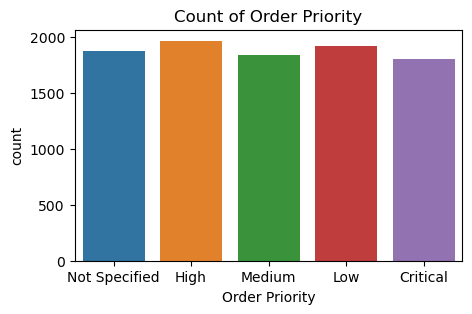

In [69]:
plt.figure(figsize=(5,3))
plt.title('Count of Order Priority')
sns.countplot(x='Order Priority', data=store)

# Ship Mode Count

In [72]:
store['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [82]:
x = store['Ship Mode'].value_counts().index
y = store['Ship Mode'].value_counts().values

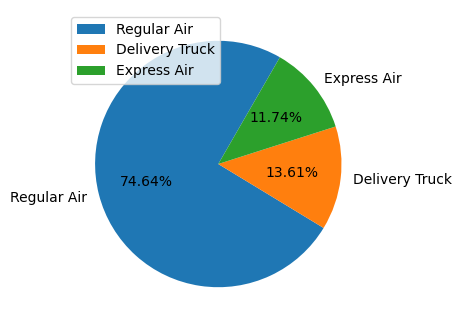

In [104]:
plt.figure(figsize=(4,4))
plt.pie(y, labels=x, startangle=60, autopct='%0.2f%%')
plt.legend(loc=2)
plt.show()

<Axes: title={'center': 'Ship Mode'}, xlabel='Ship Mode', ylabel='count'>

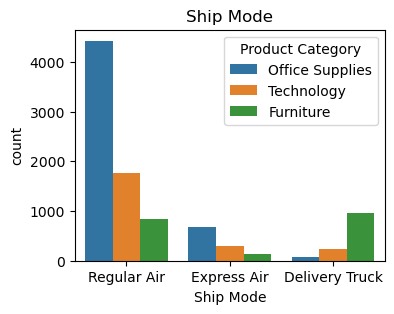

In [112]:
plt.figure(figsize=(4,3))
plt.title("Ship Mode")
sns.countplot(x="Ship Mode", data=store, hue='Product Category')

# Customer Segment	

<Axes: xlabel='Customer Segment', ylabel='count'>

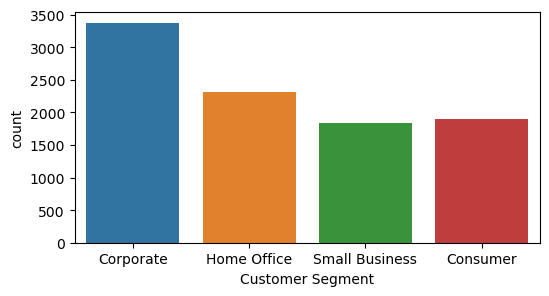

In [121]:
plt.figure(figsize=(6,3))
sns.countplot(x='Customer Segment', data=store)

# Product Category  

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

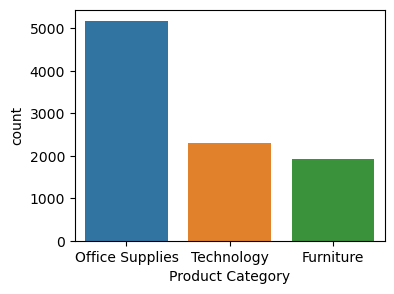

In [148]:
plt.figure(figsize=(4,3))
sns.countplot(x='Product Category', data=store)
store['Product Category'].unique()

<Axes: xlabel='Product Category', ylabel='count'>

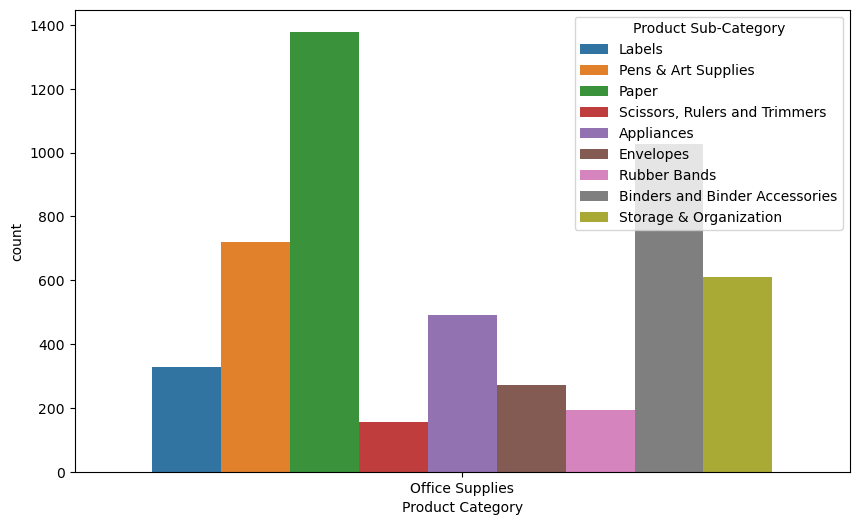

In [132]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='Product Category', data=store[store['Product Category'] == 'Office Supplies'], hue='Product Sub-Category')

<Axes: xlabel='Product Category', ylabel='count'>

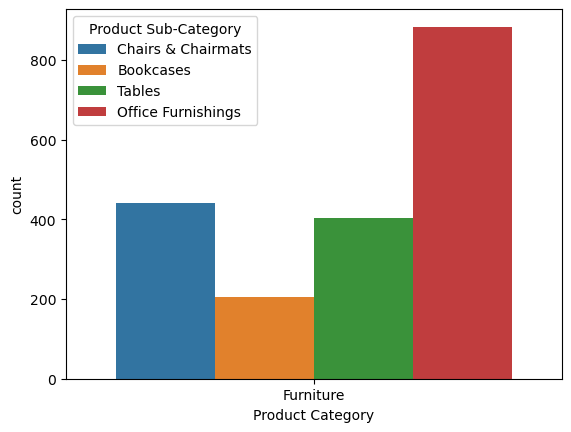

In [140]:
sns.countplot(x='Product Category', data=store[store['Product Category'] == 'Furniture'], hue='Product Sub-Category')

<Axes: xlabel='Product Category', ylabel='count'>

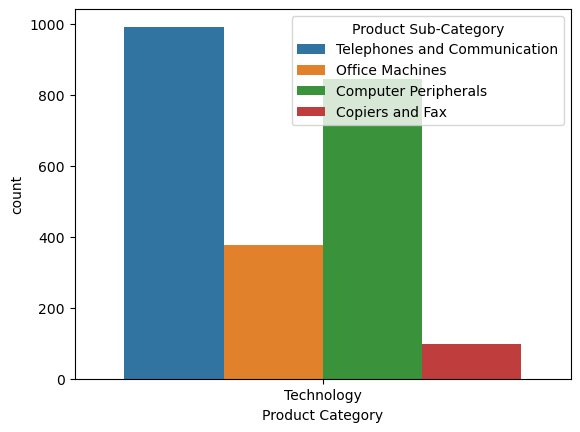

In [150]:
sns.countplot(x='Product Category', data=store[store['Product Category'] == 'Technology'], hue='Product Sub-Category')

# Calculating Product Based Profit

<Axes: xlabel='Product Category', ylabel='Profit'>

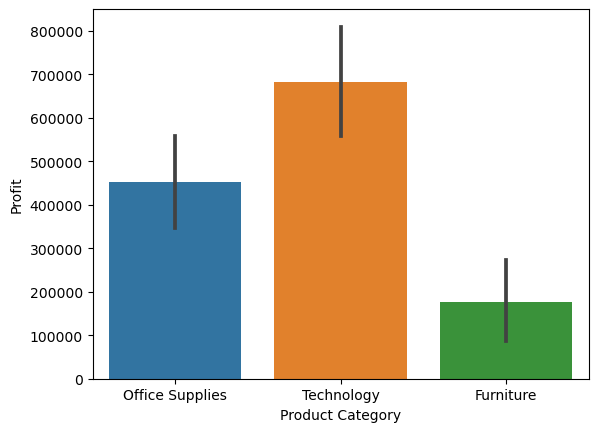

In [158]:
sns.barplot(x='Product Category', y='Profit', data=store, estimator='sum')

# State Vise Sells Calculation

In [167]:
# Top 5
store['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

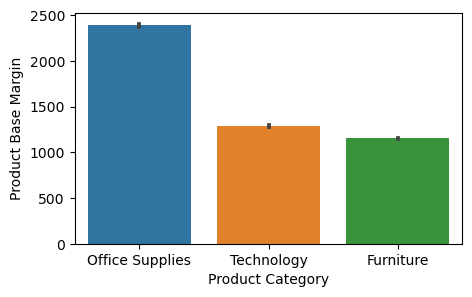

In [175]:
plt.figure(figsize=(5,3))
sns.barplot(x='Product Category', y='Product Base Margin', data=store, estimator=sum)